# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas as pd
data = pd.read_csv('preprocessed_data.csv',nrows=50000)
print('The shape of the data is : ',data.shape)

The shape of the data is :  (50000, 9)


In [2]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [3]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [4]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



In [5]:
y=data['project_is_approved'].values
X=data.drop(['project_is_approved'],axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, stratify=y)

In [7]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(33500, 8) (33500,)
(16500, 8) (16500,)


<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [8]:
Preprocessed_Essay=data['essay'].values 

In [9]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_essay_bow= CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer_essay_bow.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer_essay_bow.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer_essay_bow.transform(X_test['essay'].values)

print('.........After vectorization.........')
print(X_train_essay_bow.shape,y_train.shape)
print(X_test_essay_bow.shape,y_test.shape)
print('.'*100)


.........After vectorization.........
(33500, 5000) (33500,)
(16500, 5000) (16500,)
....................................................................................................


In [11]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_essay_tfidf= TfidfVectorizer(min_df=10)

vectorizer_essay_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf=vectorizer_essay_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf=vectorizer_essay_tfidf.transform(X_test['essay'].values)

print('.........After vectorization.........')
print(X_train_essay_tfidf.shape,y_train.shape)
print(X_test_essay_tfidf.shape,y_test.shape)
print('.'*100)



.........After vectorization.........
(33500, 10305) (33500,)
(16500, 10305) (16500,)
....................................................................................................


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [12]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().

<h3>1.4.1 encoding categorical features: Teacher Prefix</h3>

In [13]:
vectorizer_prefix=CountVectorizer()
vectorizer_prefix.fit(X_train['teacher_prefix'].values)

X_train_teacher=vectorizer_prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher=vectorizer_prefix.transform(X_test['teacher_prefix'].values)

print('.........After vectorization.........')
print(X_train_teacher.shape,y_train.shape)
print(X_test_teacher.shape,y_test.shape)
print(vectorizer_prefix.get_feature_names())
print('*'*100)

.........After vectorization.........
(33500, 5) (33500,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<h3>1.4.2 encoding categorical features: Project Grade Category <h3>

In [14]:
vectorizer_grade= CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values)

X_train_grade=vectorizer_grade.transform(X_train['project_grade_category'].values)
X_test_grade=vectorizer_grade.transform(X_test['project_grade_category'].values)

print('.........After vectorization.........')
print(X_train_grade.shape,y_train.shape)
print(X_test_grade.shape,y_test.shape)
print(vectorizer_grade.get_feature_names())
print('*'*100)

.........After vectorization.........
(33500, 4) (33500,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<h3>1.4.3 encoding categorical features: School State <h3> 

In [15]:
vectorizer_state=CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values)

X_train_state=vectorizer_state.transform(X_train['school_state'].values)
X_test_state=vectorizer_state.transform(X_test['school_state'].values)

print('.........After vectorization.........')
print(X_train_state.shape,y_train.shape)
print(X_test_state.shape,y_test.shape)
print(vectorizer_state.get_feature_names())
print('*'*100)

.........After vectorization.........
(33500, 51) (33500,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<h3> 1.4.4 encoding categorical features: Clean Categories <h3>

In [16]:
vectorizer_categories= CountVectorizer()
vectorizer_categories.fit(X_train['clean_categories'].values)

X_train_categories=vectorizer_categories.transform(X_train['clean_categories'].values)
X_test_categories=vectorizer_categories.transform(X_test['clean_categories'].values)

print('.........After vectorization.........')
print(X_train_categories.shape,y_train.shape)
print(X_test_categories.shape,y_test.shape)
print(vectorizer_categories.get_feature_names())
print('*'*100)

.........After vectorization.........
(33500, 9) (33500,)
(16500, 9) (16500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<h3>1.4.5 encoding categorical features: Clean Subcategories <h3>

In [17]:
vectorizer_sub=CountVectorizer()
vectorizer_sub.fit(X_train['clean_subcategories'].values)

X_train_subcategories=vectorizer_sub.transform(X_train['clean_subcategories'].values)
X_test_subcategories=vectorizer_sub.transform(X_test['clean_subcategories'].values)

print('.........After vectorization.........')
print(X_train_subcategories.shape,y_train.shape)
print(X_test_subcategories.shape,y_test.shape)
print(vectorizer_sub.get_feature_names())
print('*'*100)

.........After vectorization.........
(33500, 30) (33500,)
(16500, 30) (16500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
****************************************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<h2> 1.4 encoding numerical features <h2>

<h3> 1.4.1 encoding numerical features : Price <h3>

In [18]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape((-1,1)))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
print('.........After vectorization.........')
print(X_train_price_norm.shape,y_train.shape)
print(X_test_price_norm.shape,y_test.shape)
print('*'*100)


.........After vectorization.........
(33500, 1) (33500,)
(16500, 1) (16500,)
****************************************************************************************************


<h3> 1.4.2 encoding numerical features : Teacher number of previously posted projects <h3>

In [19]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_posted_projects_norm=normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_posted_projects_norm= normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print('.........After vectorization.........')
print(X_train_posted_projects_norm.shape,y_train.shape)
print(X_test_posted_projects_norm.shape,y_test.shape)
print('*'*100)

.........After vectorization.........
(33500, 1) (33500,)
(16500, 1) (16500,)
****************************************************************************************************


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

<h3> Merging all the features for set1: BOW <h3>

In [20]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

from scipy.sparse import hstack
X_tr=hstack((X_train_essay_bow,X_train_teacher,X_train_grade,X_train_state,X_train_categories,X_train_subcategories,X_train_price_norm,X_train_posted_projects_norm)).tocsr()
X_te=hstack((X_test_essay_bow,X_test_teacher,X_test_grade,X_test_state,X_test_categories,X_test_subcategories,X_test_price_norm,X_test_posted_projects_norm)).tocsr()

print('Final Data Matrix')
print(X_tr.shape,y_train.shape)
print(X_te.shape,y_test.shape)
print('*'*100)

Final Data Matrix
(33500, 5101) (33500,)
(16500, 5101) (16500,)
****************************************************************************************************


In [21]:
pip install sklearn

In [22]:
# Applying the multinomial Naive Bayes on Set 1
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  roc_auc_score
import matplotlib.pyplot as plt

multiNB_bow= MultinomialNB(class_prior=[0.5,0.5])
parameters={'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,100,200,300]}
clf= GridSearchCV(multiNB_bow, parameters, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr,y_train)
# best alpha value for set 1
print(clf.best_estimator_)

MultinomialNB(alpha=0.05, class_prior=[0.5, 0.5])


In [23]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results=results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']




In [24]:
# convertng the alpha values to log alpha values for better visulization
import math
alpha=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,100,200,300]
log_alpha=[]
for i in alpha:
  a=math.log(i)
  log_alpha.append(a)
print(log_alpha)

[-11.512925464970229, -9.903487552536127, -9.210340371976182, -7.600902459542082, -6.907755278982137, -5.298317366548036, -4.605170185988091, -2.995732273553991, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092, 5.298317366548036, 5.703782474656201]


<h2> Hyperparameter Vs AUC Score plot : Set1 <h2>

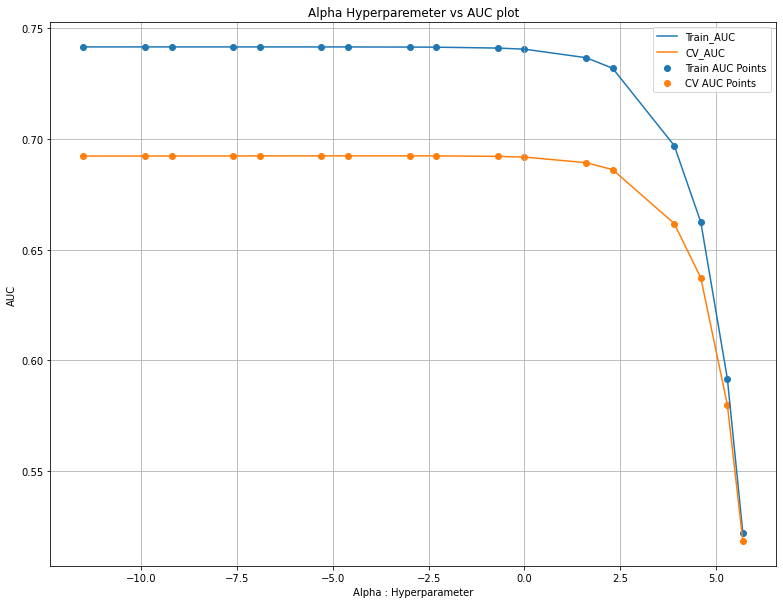

In [25]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.

plt.figure(figsize=(13,10))
plt.plot(log_alpha,train_auc,label='Train_AUC')
plt.plot(log_alpha,cv_auc,label='CV_AUC')

plt.scatter(log_alpha,train_auc,label='Train AUC Points')
plt.scatter(log_alpha,cv_auc,label='CV AUC Points')


plt.title('Alpha Hyperparemeter vs AUC plot')
plt.legend()
plt.xlabel('Alpha : Hyperparameter')
plt.ylabel('AUC')
plt.grid()
plt.show()

<h2> Observation <h2>
<h4> From the above Hyperparameter Vs AUC plot we can observe a decrease in the AUC Score as Alpha Hypermeter Increses. We choose 0.001 as the alpha value.<h4>

In [26]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.053571,0.002741,0.007002,0.002223,1e-05,{'alpha': 1e-05},0.700006,0.671080,0.712106,0.687929,0.702660,0.710816,0.710487,0.662969,0.689186,0.674668,0.692191,0.016979,9,0.740270,0.740932,0.740146,0.742892,0.741653,0.741701,0.742331,0.742831,0.741511,0.740426,0.741469,0.000963
1,0.053755,0.002876,0.006195,0.000428,5e-05,{'alpha': 5e-05},0.700005,0.671080,0.712106,0.687929,0.702772,0.710816,0.710486,0.663093,0.689186,0.674668,0.692214,0.016964,8,0.740269,0.740932,0.740146,0.742892,0.741643,0.741701,0.742331,0.742830,0.741511,0.740426,0.741468,0.000963
2,0.053372,0.002259,0.006084,0.000200,0.0001,{'alpha': 0.0001},0.700006,0.671080,0.712106,0.687930,0.702813,0.710816,0.710486,0.663159,0.689186,0.674668,0.692225,0.016955,7,0.740269,0.740932,0.740146,0.742892,0.741637,0.741701,0.742331,0.742829,0.741510,0.740426,0.741467,0.000963
3,0.053603,0.002580,0.006282,0.000879,0.0005,{'alpha': 0.0005},0.700007,0.671083,0.712107,0.687929,0.702941,0.710815,0.710485,0.663302,0.689185,0.674667,0.692252,0.016939,6,0.740269,0.740931,0.740146,0.742891,0.741618,0.741700,0.742330,0.742826,0.741510,0.740425,0.741465,0.000962
4,0.052733,0.001850,0.005981,0.000210,0.001,{'alpha': 0.001},0.700006,0.671082,0.712106,0.687930,0.703000,0.710814,0.710486,0.663359,0.689186,0.674666,0.692264,0.016933,5,0.740269,0.740930,0.740145,0.742890,0.741608,0.741699,0.742329,0.742824,0.741509,0.740425,0.741463,0.000961


## Observation ##
##### considering the best alpha to be 0.001 #####


In [27]:
best_alpha1=0.001

In [28]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

<h2> ROC-AUC Curve : Set 1 <h2>

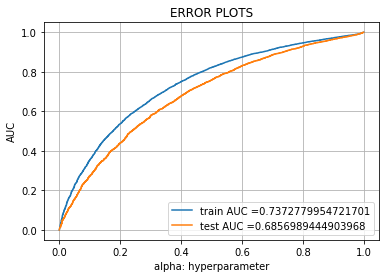

In [30]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

from sklearn.metrics import roc_curve,auc

alpha=MultinomialNB(alpha=best_alpha1,class_prior=[0.5,0.5])
alpha.fit(X_tr,y_train)

y_train_pred = batch_predict(alpha, X_tr)    
y_test_pred = batch_predict(alpha, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_auc1=auc(train_fpr,train_tpr)
test_auc1=auc(test_fpr,test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_auc1))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_auc1))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [31]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.


In [32]:
import numpy as np
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [33]:
# Confusion Matrix
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
train_predictions=predict_with_best_t(y_train_pred,best_t)
train_matrix=confusion_matrix(y_train, train_predictions)
print(train_matrix)
print("Test confusion matrix")
test_predictions=predict_with_best_t(y_test_pred, best_t)
test_matrix=confusion_matrix(y_test, test_predictions)
print(test_matrix)

the maximum value of tpr*(1-fpr) 0.46216988355470917 for threshold 0.568
Train confusion matrix
[[ 3726  1639]
 [ 9412 18723]]
Test confusion matrix
[[1656  986]
 [4881 8977]]


<h3> Heatmap of Confusion Matrix : set 1 <h3>

[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

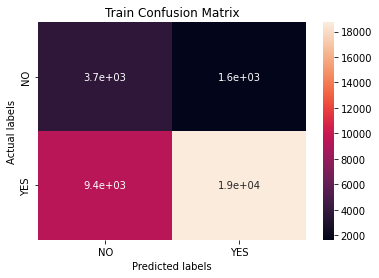

In [34]:
# Heatmap of the Confusion Matrix
# Train Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax=plt.subplot()
sns.heatmap(train_matrix,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Train Confusion Matrix')
ax.xaxis.set_ticklabels(['NO','YES'])
ax.yaxis.set_ticklabels(['NO','YES'])

[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

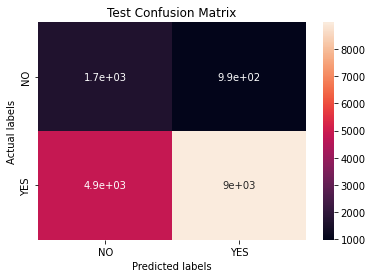

In [35]:
# Test Confusion Matrix
ax=plt.subplot()
sns.heatmap(test_matrix,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Test Confusion Matrix')
ax.xaxis.set_ticklabels(['NO','YES'])
ax.yaxis.set_ticklabels(['NO','YES'])

#### Set 2

<h3> Merging all the features for set2: Tf-IDF <h3>

In [36]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
X_tr=hstack((X_train_essay_tfidf,X_train_teacher,X_train_grade,X_train_state,X_train_categories,X_train_subcategories,X_train_price_norm,X_train_posted_projects_norm)).tocsr()
X_te=hstack((X_test_essay_tfidf,X_test_teacher,X_test_grade,X_test_state,X_test_categories,X_test_subcategories,X_test_price_norm,X_test_posted_projects_norm)).tocsr()

print('Final Data Matrix')
print(X_tr.shape,y_train.shape)
print(X_te.shape,y_test.shape)
print('*'*100)


Final Data Matrix
(33500, 10406) (33500,)
(16500, 10406) (16500,)
****************************************************************************************************


In [37]:
# Applying Multinomial Naive Bayes on set 2
multiNB_bow= MultinomialNB(class_prior=[0.5,0.5])
parameters={'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,100,200,300]}
clf= GridSearchCV(multiNB_bow, parameters, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr,y_train)
print(clf.best_estimator_)

MultinomialNB(alpha=0.05, class_prior=[0.5, 0.5])


In [38]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results=results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

In [39]:
# Converting the alpha values to log aplha values 
import math
alpha=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,100,200,300]
log_alpha=[]
for i in alpha:
  a=math.log(i)
  log_alpha.append(a)
print(log_alpha)

[-11.512925464970229, -9.903487552536127, -9.210340371976182, -7.600902459542082, -6.907755278982137, -5.298317366548036, -4.605170185988091, -2.995732273553991, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092, 5.298317366548036, 5.703782474656201]


<h2> Hyperparameter Vs AUC Score plot : Set2 <h2>

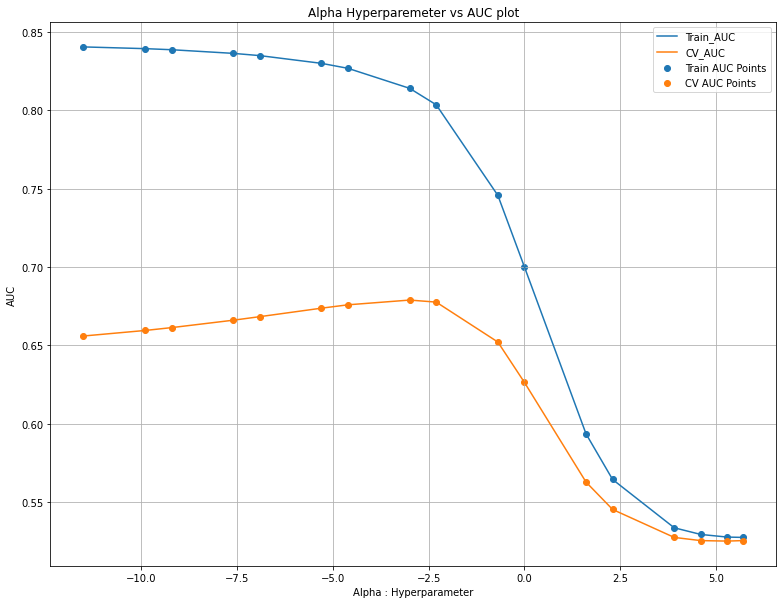

In [40]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.

plt.figure(figsize=(13,10))
plt.plot(log_alpha,train_auc,label='Train_AUC')
plt.plot(log_alpha,cv_auc,label='CV_AUC')

plt.scatter(log_alpha,train_auc,label='Train AUC Points')
plt.scatter(log_alpha,cv_auc,label='CV AUC Points')


plt.title('Alpha Hyperparemeter vs AUC plot')
plt.legend()
plt.xlabel('Alpha : Hyperparameter')
plt.ylabel('AUC')
plt.grid()
plt.show()

In [43]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
best_alpha2=0.05

<h2> ROC-AUC Curve : Set 2<h2>

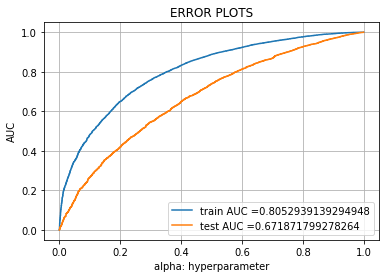

In [44]:
alpha=MultinomialNB(alpha=best_alpha2,class_prior=[0.5,0.5])
alpha.fit(X_tr,y_train)

y_train_pred = batch_predict(alpha, X_tr)    
y_test_pred = batch_predict(alpha, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_auc2=auc(train_fpr,train_tpr)
test_auc2=auc(test_fpr,test_tpr)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_auc2))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_auc2))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [45]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
train_predictions=predict_with_best_t(y_train_pred,best_t)
train_matrix=confusion_matrix(y_train, train_predictions)
print(train_matrix)
print("Test confusion matrix")
test_predictions=predict_with_best_t(y_test_pred, best_t)
test_matrix=confusion_matrix(y_test, test_predictions)
print(test_matrix)

the maximum value of tpr*(1-fpr) 0.5336398283406244 for threshold 0.504
Train confusion matrix
[[ 3989  1376]
 [ 7942 20193]]
Test confusion matrix
[[1478 1164]
 [4395 9463]]


<h3> Heatmap of Confusion Matrix : set 2 <h3>

[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

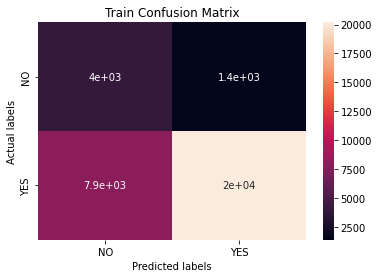

In [46]:
ax=plt.subplot()
sns.heatmap(train_matrix,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Train Confusion Matrix')
ax.xaxis.set_ticklabels(['NO','YES'])
ax.yaxis.set_ticklabels(['NO','YES'])

[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

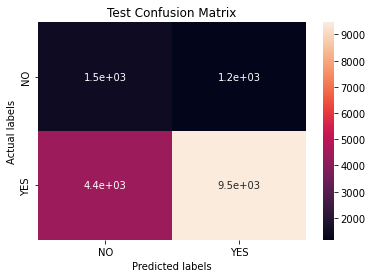

In [47]:
ax=plt.subplot()
sns.heatmap(test_matrix,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Test Confusion Matrix')
ax.xaxis.set_ticklabels(['NO','YES'])
ax.yaxis.set_ticklabels(['NO','YES'])

<h2> Top 20 features for positve and negative class : Set 1 <h2>

In [48]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)


In [49]:
X_tr=hstack((X_train_essay_bow,X_train_teacher,X_train_grade,X_train_state,X_train_categories,X_train_subcategories,X_train_price_norm,X_train_posted_projects_norm)).tocsr()
X_te=hstack((X_test_essay_bow,X_test_teacher,X_test_grade,X_test_state,X_test_categories,X_test_subcategories,X_test_price_norm,X_test_posted_projects_norm)).tocsr()


In [50]:
all_feature_names_bow=[]

In [51]:
for i in vectorizer_categories.get_feature_names():
    all_feature_names_bow.append(i)   

for i in vectorizer_sub.get_feature_names():
    all_feature_names_bow.append(i)    

for i in vectorizer_state.get_feature_names():
    all_feature_names_bow.append(i)    

for i in vectorizer_prefix.get_feature_names():
    all_feature_names_bow.append(i)   

for i in vectorizer_grade.get_feature_names():
    all_feature_names_bow.append(i)   

for i in vectorizer_essay_bow.get_feature_names():
    all_feature_names_bow.append(i)   


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [52]:
all_feature_names_bow.append("price")

all_feature_names_bow.append("prev_proj")

In [53]:
total_feature_names=len(all_feature_names_bow)
print(total_feature_names)

5101


In [54]:
MN_bow=MultinomialNB(alpha=0.001,class_prior=[0.5,0.5])
MN_bow.fit(X_tr,y_train)

MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5])

In [55]:
bow_feature_pos={}
for i in range(total_feature_names):
  bow_feature_pos[i]=MN_bow.feature_log_prob_[1,i]

final_bow_feature_pos=pd.DataFrame({'estimates':list(bow_feature_pos.values()),'feature_names':list(all_feature_names_bow)})

final_bow_feature_pos=final_bow_feature_pos.sort_values(by=['estimates'],ascending=False)

print('TOP 20 FEATURES BELONGING TO POSTIVE CLASS')
final_bow_feature_pos.head(20)

TOP 20 FEATURES BELONGING TO POSTIVE CLASS


,estimates,feature_names
4001,-3.223101,spend time
3592,-4.367988,relaxed
2781,-4.687909,memorable
2306,-4.719707,knit
677,-4.720095,cases
4408,-4.967017,supported
2930,-5.016694,my students range
4467,-5.029502,teamwork
2249,-5.051589,it would
2801,-5.075988,mine


In [56]:
bow_feature_neg={}
for i in range(total_feature_names):
  bow_feature_neg[i]=MN_bow.feature_log_prob_[0,i]

final_bow_feature_neg=pd.DataFrame({'estimates': list(bow_feature_neg.values()),'feature_names':list(all_feature_names_bow)})

final_bow_feature_neg=final_bow_feature_neg.sort_values(by=['estimates'],ascending= False)

In [57]:
print('TOP 20 FEATURES BELONGING TO NEGATIVE FEATURES')
final_bow_feature_neg.head(20)

TOP 20 FEATURES BELONGING TO NEGATIVE FEATURES


,estimates,feature_names
4001,-3.225873,spend time
3592,-4.323139,relaxed
2306,-4.628786,knit
2781,-4.697232,memorable
677,-4.743439,cases
2930,-4.943182,my students range
2249,-4.981557,it would
1860,-5.035347,graders
4467,-5.055617,teamwork
2801,-5.077678,mine


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [59]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

In [64]:
from prettytable import PrettyTable

x=PrettyTable()

x.field_names=['index','Vectorizer','Model','Hyperparameter','AUC_Train','AUC_Test']
x.add_row(['1','BOW','MultinomialNB',best_alpha1,train_auc1,test_auc1])
x.add_row(['2','TFIDF','MultinomialNB',best_alpha2,train_auc2,test_auc2])
print(x)

+-------+------------+---------------+----------------+--------------------+--------------------+
| index | Vectorizer |     Model     | Hyperparameter |     AUC_Train      |      AUC_Test      |
+-------+------------+---------------+----------------+--------------------+--------------------+
|   1   |    BOW     | MultinomialNB |     0.001      | 0.7372779954721701 | 0.6856989444903968 |
|   2   |   TFIDF    | MultinomialNB |      0.05      | 0.8052939139294948 | 0.671871799278264  |
+-------+------------+---------------+----------------+--------------------+--------------------+
